In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from functools import reduce
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
directory = "../data/sac/"
folders = [i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]

In [3]:
experiments = dict()
for i in folders:
    tmp = os.listdir(directory + i)
    paths = []
    for j, file in enumerate(tmp):
        if file[-4:] == ".csv":
            paths.append(os.path.join(directory, i, file))
    experiments[i] = paths

In [4]:
def read_filelist(filelist):
    data_list = []
    for i in filelist:
        dataset = pd.read_csv(i)
        dataset = dataset[["Step", "Value"]]
        dataset.Step = dataset.Step.round(-4)
        dataset = dataset.drop_duplicates()
        data_list.append(dataset)
        
    dataset = reduce(lambda x, y: pd.merge(x, y, how="outer", on = 'Step'), data_list)
    dataset = dataset.sort_values(by="Step")
    
    dataset = dataset.fillna(method='ffill')
    dataset["mean"] = dataset.iloc[:,1:].mean(axis=1)
    dataset["max"] =  dataset.iloc[:,1:].max(axis=1)
    dataset["min"] =  dataset.iloc[:,1:].min(axis=1)
    dataset["Step"] = dataset["Step"] / 1e6
    dataset = dataset[dataset["Step"] <= 1]
    return dataset

# Fitted alpha

In [5]:
def plot_datasets(fitted_dataset, fixed_dataset, title="Title"):
    #Plotting:
    sns.lineplot(fitted_dataset["Step"], fitted_dataset["mean"], linewidth=2, label="Fitted alpha") #mean curve.
    plt.fill_between(fitted_dataset["Step"], fitted_dataset["min"], fitted_dataset["max"], color='b', alpha=.1) #std curves.
    sns.lineplot(fixed_dataset["Step"], fixed_dataset["mean"], linewidth=2, label="Fixed alpha") #mean curve.
    plt.fill_between(fixed_dataset["Step"], fixed_dataset["min"], fixed_dataset["max"], color='r', alpha=.1) #std curves.
    plt.xlabel("million steps")
    plt.ylabel("average return")
    plt.title(title)
    plt.legend(loc="upper left")

In [6]:
train_alpha_hcheetah = read_filelist(experiments["train_alpha_hcheetah"])
train_alpha_hopper = read_filelist(experiments["train_alpha_hopper"])
fix_alpha_hcheetah = read_filelist(experiments["fix_alpha_hcheetah"])
fix_alpha_hopper = read_filelist(experiments["fix_alpha_hopper"])

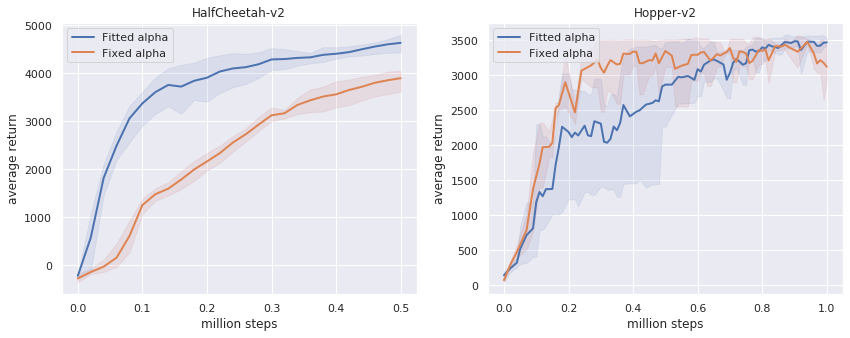

In [7]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plot_datasets(train_alpha_hcheetah, fix_alpha_hcheetah, "HalfCheetah-v2")
plt.subplot(1, 2, 2)
plot_datasets(train_alpha_hopper, fix_alpha_hopper, "Hopper-v2")

# Net size

In [8]:
def plot_datasets(bigger, smaller, title="Title"):
    #Plotting:
    sns.lineplot(bigger["Step"], bigger["mean"], linewidth=2, label="256 neurons") #mean curve.
    plt.fill_between(bigger["Step"], bigger["min"], bigger["max"], color='b', alpha=.1) #std curves.
    sns.lineplot(smaller["Step"], smaller["mean"], linewidth=2, label="64 neurons") #mean curve.
    plt.fill_between(smaller["Step"], smaller["min"], smaller["max"], color='r', alpha=.1) #std curves.
    plt.xlabel("million steps")
    plt.ylabel("average return")
    plt.title(title)
    plt.legend(loc="upper left")

In [9]:
sac_medium_walker = read_filelist(experiments["sac_medium_walker"])
sac_small_walker = read_filelist(experiments["sac_small_walker"])

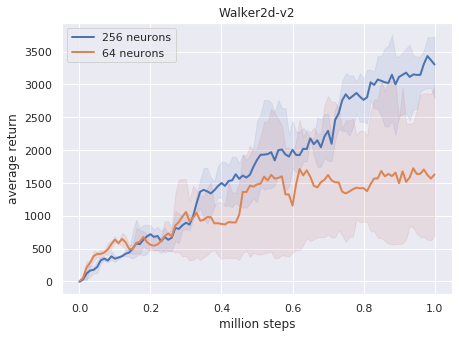

In [10]:
plt.figure(figsize=(7,5))
plot_datasets(sac_medium_walker, sac_small_walker, "Walker2d-v2")